In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
import collections, numpy
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC

In [20]:
def load_data(path,target):
    df = pd.read_csv(path)
    y = df[target]
    X = df.drop(labels = target, axis = 1)
    X = X.apply(pd.to_numeric)
    #train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.10, random_state=42)
    #return train_X, test_X, train_y, test_y
    return df,X,y
    
def load_mutated_data(path,target):
    df = pd.read_csv(path)
    y = df[target]
    X = df.drop(labels = target, axis = 1)
    X = X.apply(pd.to_numeric)
    return df,X,y

In [47]:
#Get Dataset
file = 'Data/NSL-KDD/modified/train.csv'
train_df, train_X, train_y = load_data(file,'defects')
y_train = []
for instance in train_y.values:
    if instance == 'normal':
        y_train.append(1)
    else:
        y_train.append(-1)

In [29]:
file = 'Data/NSL-KDD/modified/test.csv'
test_df, test_X,test_y = load_mutated_data(file,'defects')
y_test = []
for instance in test_y.values:
    if instance == 'normal':
        y_test.append(1)
    else:
        y_test.append(-1)

In [70]:
# One Class SVM
clf =  OneClassSVM(kernel = 'sigmoid',gamma = 'scale',nu=0.4,shrinking= False)
clf.fit(train_X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale',
      kernel='sigmoid', max_iter=-1, nu=0.4, random_state=None,
      shrinking=False, tol=0.001, verbose=False)

In [71]:
predicted = clf.predict(test_X)
a = collections.Counter(predicted)
print(a)
print(metrics.classification_report(y_test, predicted))

Counter({-1: 16878, 1: 5666})
              precision    recall  f1-score   support

          -1       0.72      0.95      0.82     12833
           1       0.89      0.52      0.65      9711

   micro avg       0.76      0.76      0.76     22544
   macro avg       0.81      0.73      0.74     22544
weighted avg       0.79      0.76      0.75     22544



In [66]:
# Isolation Forest
clf_isolation =  IsolationForest(n_estimators = 100, contamination = 0.4, bootstrap = False, behaviour = 'new')
clf_isolation.fit(train_X)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.4,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [67]:
predicted = clf_isolation.predict(test_X)
a = collections.Counter(predicted)
print(a)
print(metrics.classification_report(y_test, predicted))

Counter({-1: 22370, 1: 174})
              precision    recall  f1-score   support

          -1       0.57      1.00      0.73     12833
           1       1.00      0.02      0.04      9711

   micro avg       0.58      0.58      0.58     22544
   macro avg       0.79      0.51      0.38     22544
weighted avg       0.76      0.58      0.43     22544



In [ ]:
# DBScan
clf = DBSCAN(eps=10, min_samples=30)
clf.fit(train_X)

In [ ]:
predicted = clf.labels_
a = collections.Counter(predicted)
print(a)

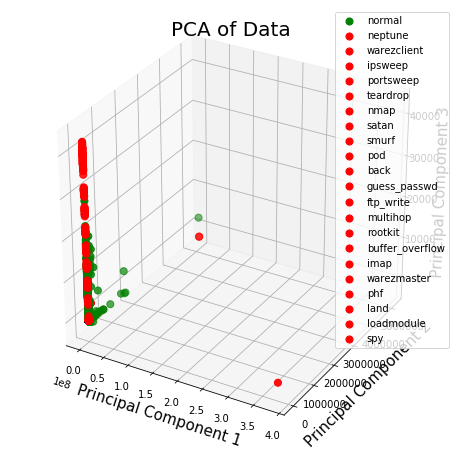

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA of Data', fontsize = 20)
targets = train_df.defects.unique()
colors = ['g', 'r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r']
for target, color in zip(targets,colors):
    indicesToKeep = train_df['defects'] == target
    ax.scatter(train_df.loc[indicesToKeep, '0']
               , train_df.loc[indicesToKeep, '1']
               , train_df.loc[indicesToKeep, '2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# decision Tree
clf_tree = tree.DecisionTreeClassifier(criterion = 'entropy',min_samples_split=20)
clf_tree.fit(train_X, y_train)

In [ ]:
predicted = clf_tree.predict(test_X)
print(metrics.classification_report(y_test, predicted))

In [ ]:
# SVM Tree
clf_tree = SVC()
clf_tree.fit(train_X, y_train)

In [ ]:
predicted = clf_tree.predict(test_X)
print(metrics.classification_report(y_test, predicted))

In [34]:
indicesToKeep = train_df['defects'] == target

In [35]:
train_df.loc[indicesToKeep, '0']

Series([], Name: 0, dtype: float64)

In [44]:
len(train_df.defects.unique())

22

In [46]:
train_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,defects
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neptune
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
